# Import lib

In [1]:
from matplotlib import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [479]:
import sys
sys.path.insert(0, os.getenv('lib_path'))

In [478]:
from dotenv import load_dotenv
load_dotenv()

True

# Try different approaches

In [97]:
img = image.imread('32_DDSM.png')

In [98]:
img

array([[0.11372549, 0.09019608, 0.07843138, ..., 0.8235294 , 0.8509804 ,
        0.8627451 ],
       [0.11372549, 0.08627451, 0.07843138, ..., 0.72156864, 0.78039217,
        0.84705883],
       [0.10980392, 0.09019608, 0.07843138, ..., 0.3882353 , 0.6784314 ,
        0.7882353 ],
       ...,
       [0.15294118, 0.10980392, 0.09411765, ..., 0.07450981, 0.07843138,
        0.25882354],
       [1.        , 0.14509805, 0.11764706, ..., 0.5764706 , 0.68235296,
        0.7607843 ],
       [1.        , 1.        , 0.41568628, ..., 0.7921569 , 0.8235294 ,
        0.8352941 ]], dtype=float32)

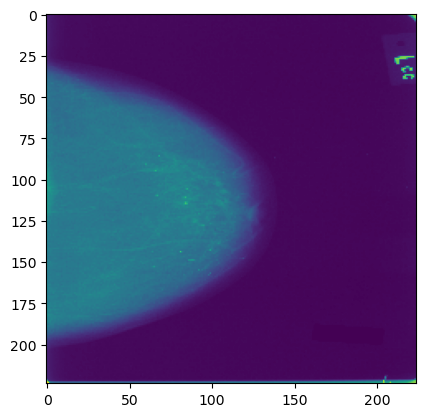

In [99]:
plt.imshow(img)

In [100]:
# convert to gray
# gray = cv2.cvtColor(img.astype('float32'), cv2.COLOR_BGR2GRAY)

gray = (img*255).astype(np.uint8)
# threshold and invert
thresh1 = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)[1]
thresh1 = 255 - thresh1

# remove borders
# count number of white pixels in columns as new 1D array
count_cols = np.count_nonzero(thresh1, axis=0)

# get first and last x coordinate where black
first_x = np.where(count_cols>0)[0][0]
last_x = np.where(count_cols>0)[0][-1]

# count number of white pixels in rows as new 1D array
count_rows = np.count_nonzero(thresh1, axis=1)

# get first and last y coordinate where black
first_y = np.where(count_rows>0)[0][0]
last_y = np.where(count_rows>0)[0][-1]

# crop image
crop = img[first_y:last_y+1, first_x:last_x+1]

# crop thresh1 and invert
thresh2 = thresh1[first_y:last_y+1, first_x:last_x+1]
thresh2 = 255 - thresh2

# get external contours and keep largest one
contours = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# make mask from contour
mask = np.zeros_like(thresh2 , dtype=np.uint8)
drawcont = cv2.drawContours(mask, [big_contour], 0, 255, -1)


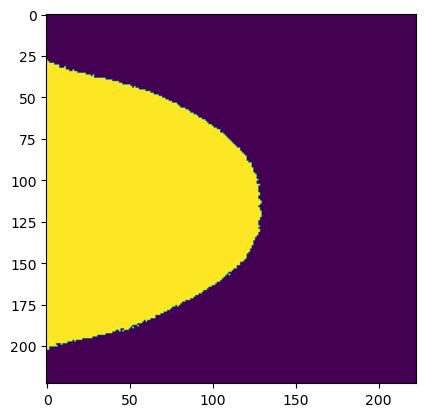

In [101]:
plt.imshow(drawcont)

In [102]:

# make crop black everywhere except where largest contour is white in mask
result = crop.copy()
result[mask==0] = 0

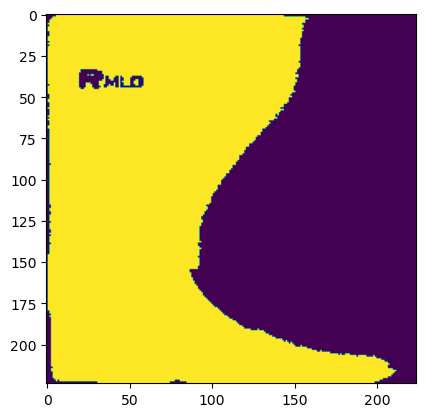

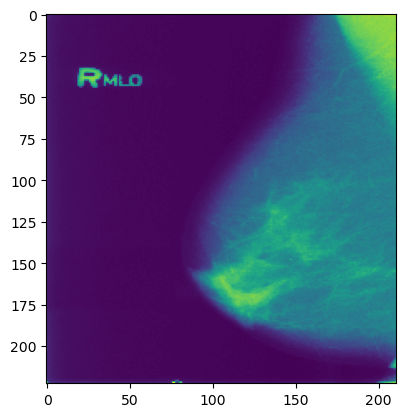

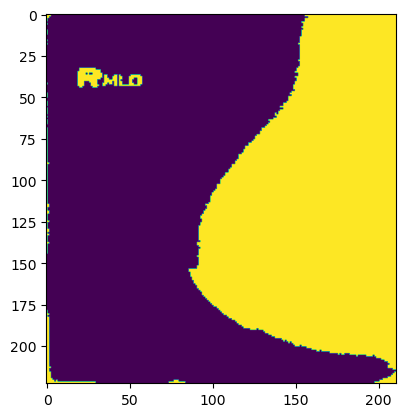

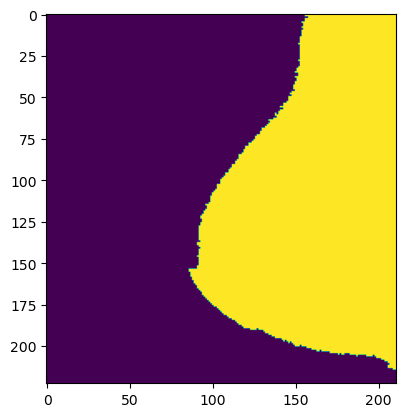

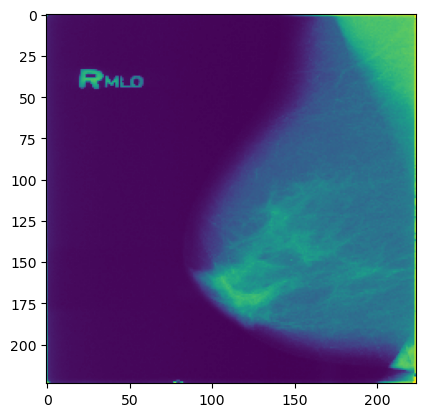

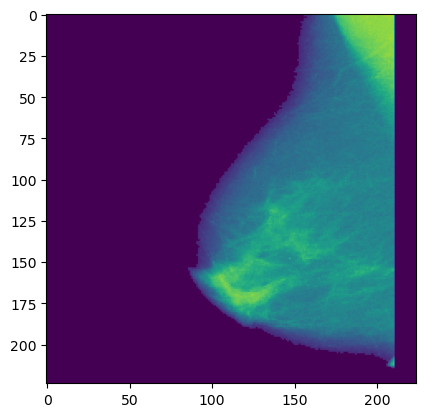

In [377]:

plt.imshow(thresh1)
plt.show()
plt.imshow(crop)
plt.show()
plt.imshow( thresh2)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(result)
plt.show()

In [104]:
img.sum()

7194.052

In [105]:
result.sum()

5949.6865

In [106]:
np.zeros((1,224))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

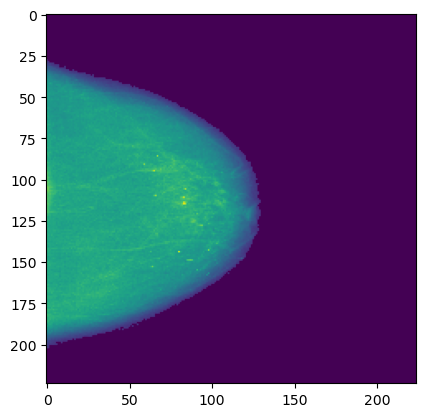

In [107]:
final_result = np.append(np.c_[result,np.zeros((223,1))], np.zeros((1,224)), axis=0)
plt.imshow(final_result)
plt.show()

In [108]:
final_result.max()

0.7019608020782471

In [113]:
final_result.shape

(224, 224)

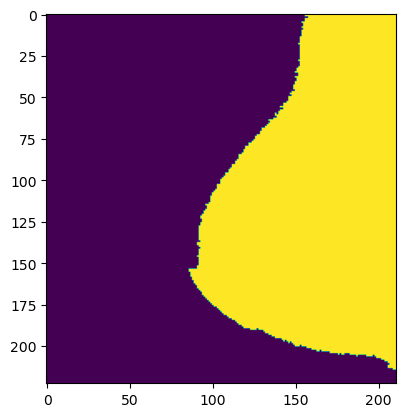

In [378]:
plt.imshow(drawcont)

In [359]:
def determine_side(im, threshold):
    # set threshold to remove artifacts around edges
    im_thres = im.copy()
    im_thres[im_thres > threshold] = 0

    # determine breast side
    col_sums_split = np.array_split(np.sum(im_thres, axis=0), 2)
    left_col_sum = np.sum(col_sums_split[0])
    right_col_sum = np.sum(col_sums_split[1])

    if left_col_sum > right_col_sum:
        breast_side = 'l'
    else:
        breast_side = 'r'
    return breast_side

In [143]:
def segment_breast(img, threshold = 25):
    # convert to gray
    # gray = cv2.cvtColor(img.astype('float32'), cv2.COLOR_BGR2GRAY)

    gray = (img*255).astype(np.uint8)
    # threshold and invert
    thresh1 = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
    thresh1 = 255 - thresh1

    # remove borders
    # count number of white pixels in columns as new 1D array
    count_cols = np.count_nonzero(thresh1, axis=0)

    # get first and last x coordinate where black
    first_x = np.where(count_cols>0)[0][0]
    last_x = np.where(count_cols>0)[0][-1]

    # count number of white pixels in rows as new 1D array
    count_rows = np.count_nonzero(thresh1, axis=1)

    # get first and last y coordinate where black
    first_y = np.where(count_rows>0)[0][0]
    last_y = np.where(count_rows>0)[0][-1]

    # crop image
    crop = img[first_y:last_y+1, first_x:last_x+1]

    # crop thresh1 and invert
    thresh2 = thresh1[first_y:last_y+1, first_x:last_x+1]
    thresh2 = 255 - thresh2

    # get external contours and keep largest one
    contours = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # make mask from contour
    mask = np.zeros_like(thresh2 , dtype=np.uint8)
    drawcont = cv2.drawContours(mask, [big_contour], 0, 255, -1)

    # make crop black everywhere except where largest contour is white in mask
    result = crop.copy()
    result[mask==0] = 0
    # reshape to 244,244
    if img.shape[1] != result.shape[1]:
        result = np.c_[result,np.zeros((result.shape[0],(img.shape[1] - result.shape[1])))]
    if img.shape[0] != result.shape[0]:
        result = np.append(result, np.zeros(((img.shape[0] - result.shape[0]),result.shape[1])), axis=0)

    return result

In [418]:
def segment_breast(img, threshold = 25):
    breast_side = determine_side(img, threshold)

    gray = (img*255).astype(np.uint8)
    # threshold and invert
    thresh1 = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
    thresh1 = 255 - thresh1

    # remove borders
    # count number of white pixels in columns as new 1D array
    count_cols = np.count_nonzero(thresh1, axis=0)
    # crop image
    if breast_side == 'l':
        # get first and last x coordinate where black
        first_x = 0
        last_x = np.where(count_cols>0)[0][-1]
    else:
        # get first and last x coordinate where black
        first_x = np.where(count_cols>0)[0][0]
        last_x = img.shape[0]-1

    # count number of white pixels in rows as new 1D array
    count_rows = np.count_nonzero(thresh1, axis=1)
        # get first and last y coordinate where black
    first_y = np.where(count_rows>0)[0][0]
    last_y = np.where(count_rows>0)[0][-1]
    crop = img[first_y:last_y+1, first_x:last_x+1]

    # crop thresh1 and invert
    thresh2 = thresh1[first_y:last_y+1, first_x:last_x+1]
    thresh2 = 255 - thresh2

    # get external contours and keep largest one
    contours = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # make mask from contour
    mask = np.zeros_like(thresh2 , dtype=np.uint8)
    drawcont = cv2.drawContours(mask, [big_contour], 0, 255, -1)

    # make crop black everywhere except where largest contour is white in mask
    result = crop.copy()# img.copy() 
    result[mask==0] = 0
    # reshape to 244,244
    if img.shape[1] != result.shape[1]:
        result = np.c_[result,np.zeros((result.shape[0],(img.shape[1] - result.shape[1])))]
    if img.shape[0] != result.shape[0]:
        result = np.append(result, np.zeros(((img.shape[0] - result.shape[0]),result.shape[1])), axis=0)

    return result

In [419]:
img = image.imread(os.path.join(root,'6036_DDSM.png'))

In [420]:
threshold = 25

In [421]:
breast_side = determine_side(img, threshold)

gray = (img*255).astype(np.uint8)
# threshold and invert
thresh1 = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
thresh1 = 255 - thresh1

# remove borders
# count number of white pixels in columns as new 1D array
count_cols = np.count_nonzero(thresh1, axis=0)
# crop image
if breast_side == 'l':
    # get first and last x coordinate where black
    first_x = 0
    last_x = np.where(count_cols>0)[0][-1]
else:
    # get first and last x coordinate where black
    first_x = np.where(count_cols>0)[0][0]
    last_x = img.shape[0]-1

# count number of white pixels in rows as new 1D array
count_rows = np.count_nonzero(thresh1, axis=1)
    # get first and last y coordinate where black
first_y = np.where(count_rows>0)[0][0]
last_y = np.where(count_rows>0)[0][-1]
crop = img[first_y:last_y+1, first_x:last_x+1]

# crop thresh1 and invert
thresh2 = thresh1[first_y:last_y+1, first_x:last_x+1]
thresh2 = 255 - thresh2

# get external contours and keep largest one
contours = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# make mask from contour
mask = np.zeros_like(thresh2 , dtype=np.uint8)
drawcont = cv2.drawContours(mask, [big_contour], 0, 255, -1)

# make crop black everywhere except where largest contour is white in mask
result = crop.copy()# img.copy() 
result[mask==0] = 0
# reshape to 244,244
if img.shape[1] != result.shape[1]:
    result = np.c_[result,np.zeros((result.shape[0],(img.shape[1] - result.shape[1])))]
if img.shape[0] != result.shape[0]:
    result = np.append(result, np.zeros(((img.shape[0] - result.shape[0]),result.shape[1])), axis=0)


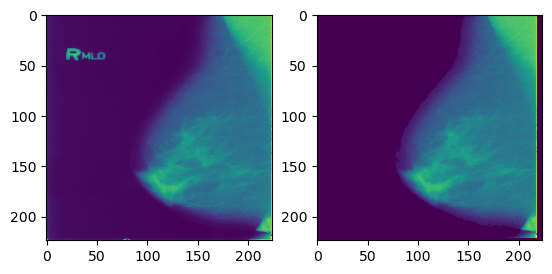

In [422]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(segment_breast(img=img, threshold= 15), vmax = 1)

In [423]:
img = image.imread('785_DDSM.png')

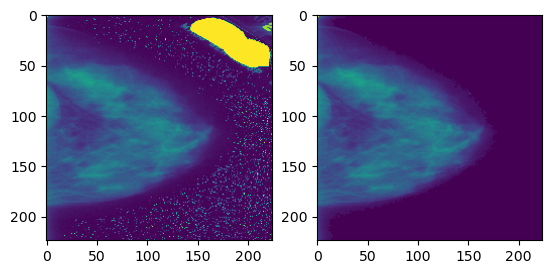

In [424]:

segmented = segment_breast(img,10)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(segmented, vmax = 1)


In [87]:
pil_version = Image.fromarray(np.uint8(final_result*255), 'L')

In [88]:
pil_version.save('final_result_pil.png')

In [89]:
final_result_loaded = image.imread('final_result_pil.png')

In [90]:
final_result_loaded.max()

0.7019608

# Generate segmented images

In [319]:
filenames_dict = {}
subsets = ['valid', 'test', 'train']
classes = ['ND', 'D']

In [ ]:

for density_class in classes:
    filenames_dict[density_class] = []
    for subset in subsets:
        files = os.listdir(
            os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_two_classes',subset,density_class)
        )
        files = [x.zfill(14) for x in files]
        filenames_dict[density_class] = filenames_dict[density_class]+ files

6036_DDSM.png


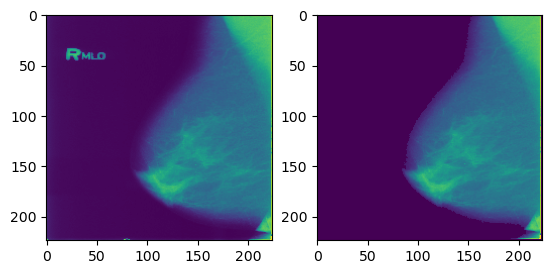

7098_DDSM.png


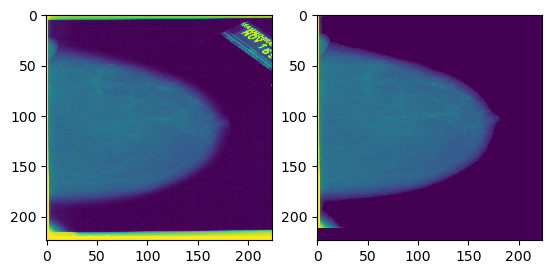

4356_DDSM.png


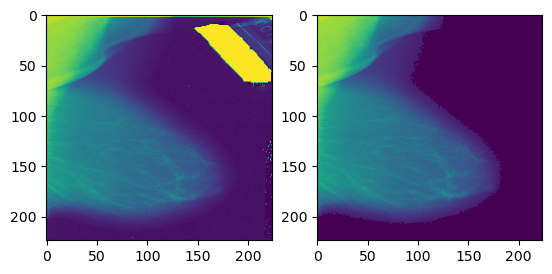

4038_DDSM.png


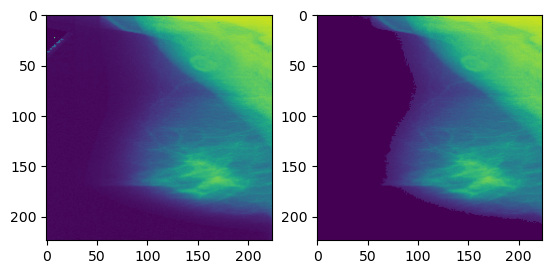

8340_DDSM.png


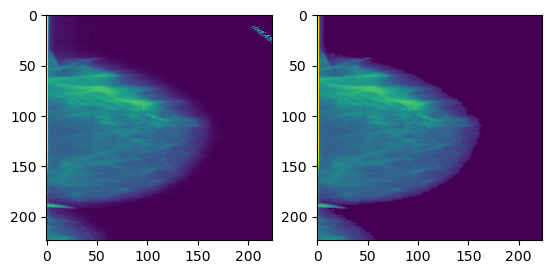

3750_DDSM.png


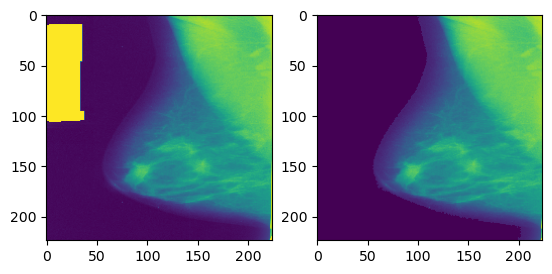

6960_DDSM.png


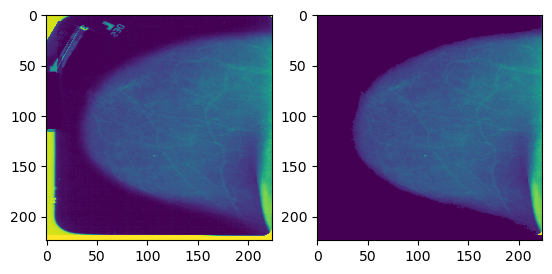

4866_DDSM.png


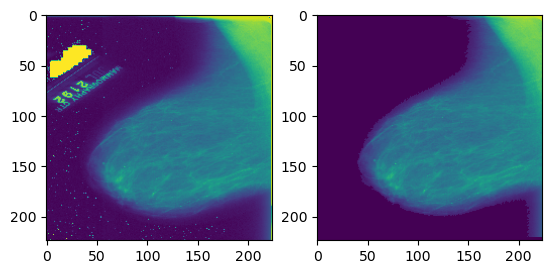

1656_DDSM.png


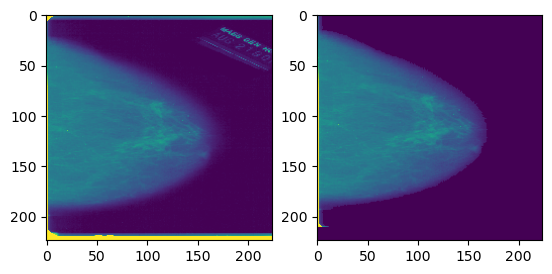

3204_DDSM.png


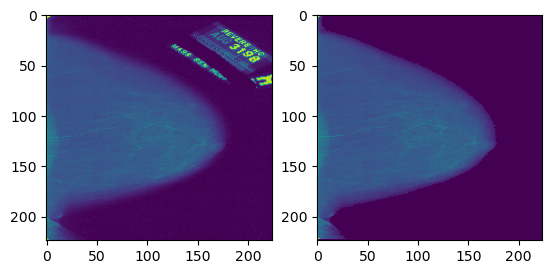

1302_DDSM.png


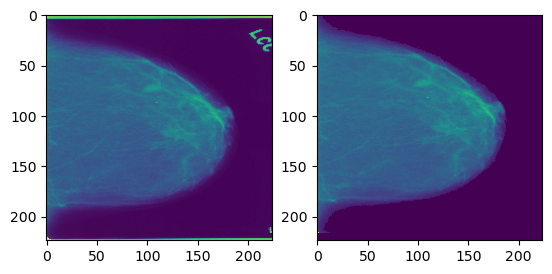

1164_DDSM.png


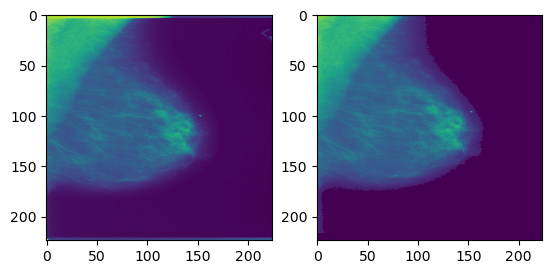

9012_DDSM.png


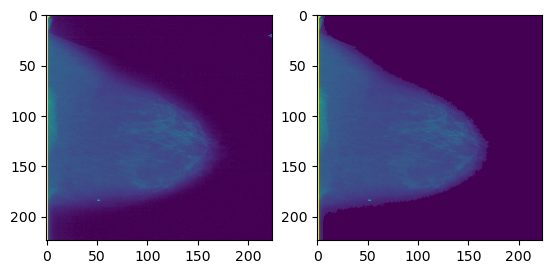

7854_DDSM.png


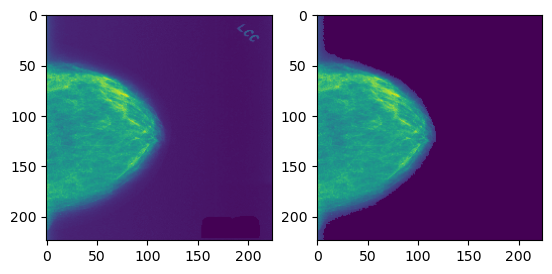

8472_DDSM.png


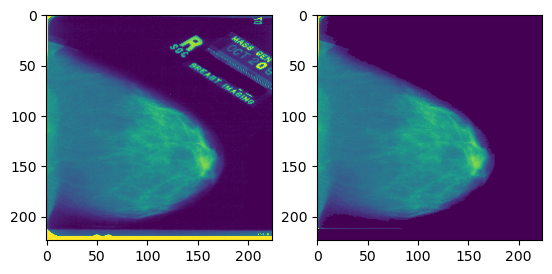

5952_DDSM.png


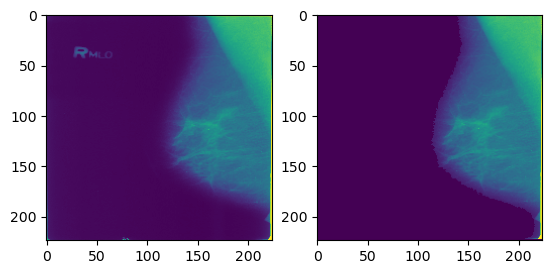

8754_DDSM.png


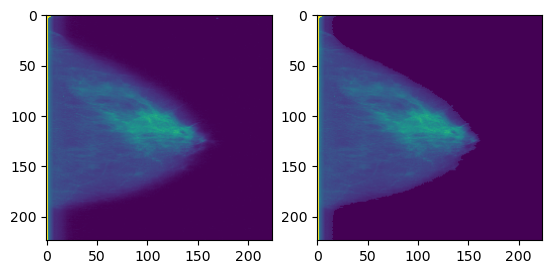

8532_DDSM.png


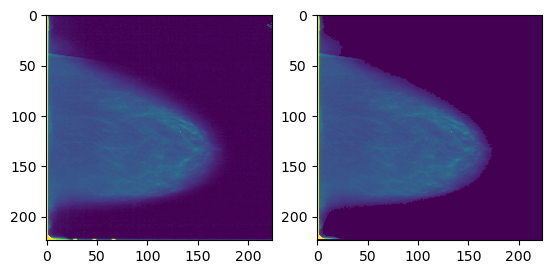

7584_DDSM.png


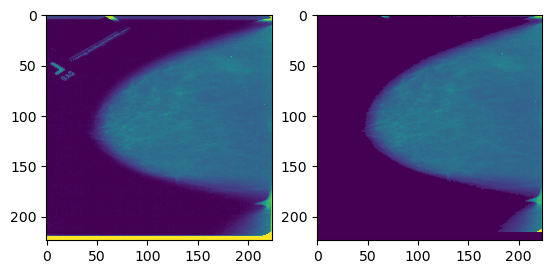

7914_DDSM.png


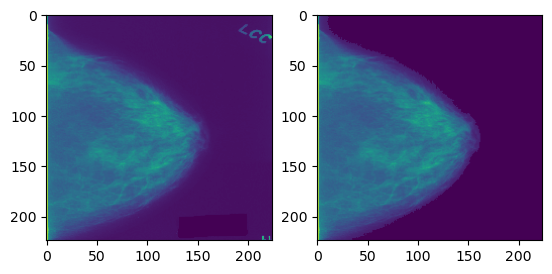

9660_DDSM.png


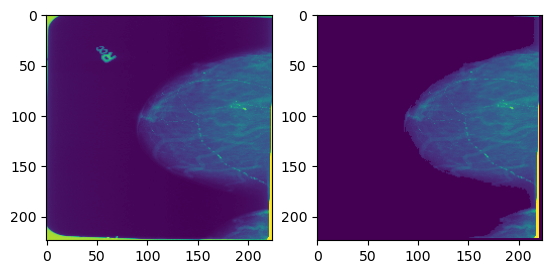

4926_DDSM.png


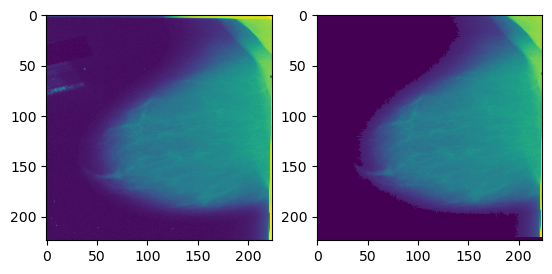

8838_DDSM.png


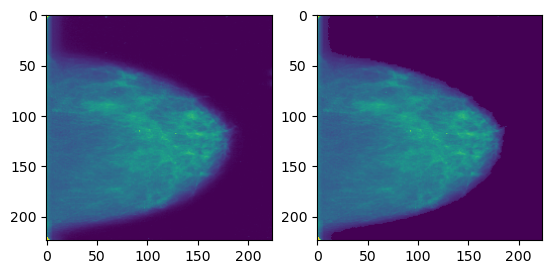

2016_DDSM.png


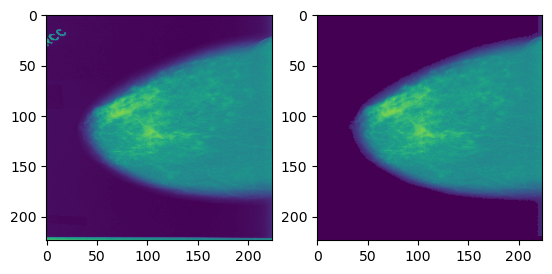

9804_DDSM.png


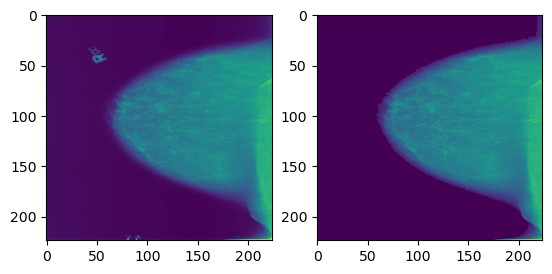

5322_DDSM.png


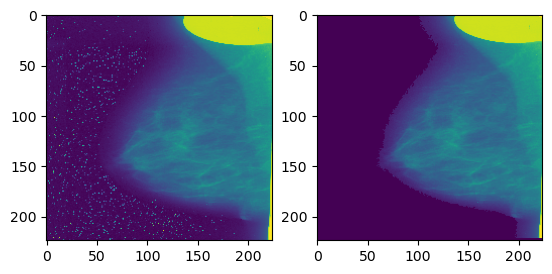

8292_DDSM.png


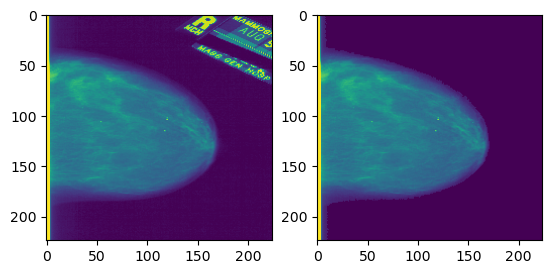

7224_DDSM.png


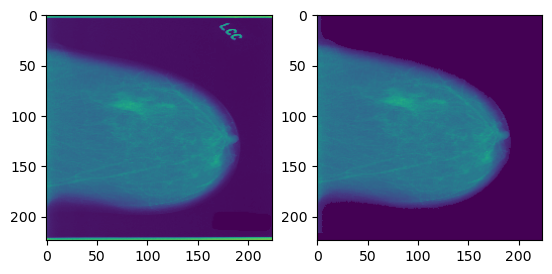

9768_DDSM.png


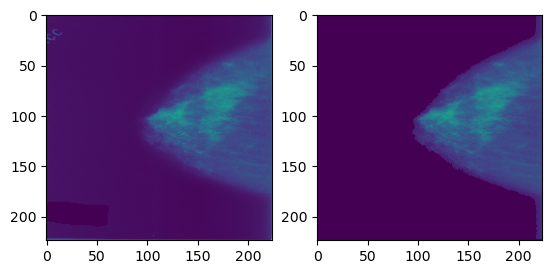

5880_DDSM.png


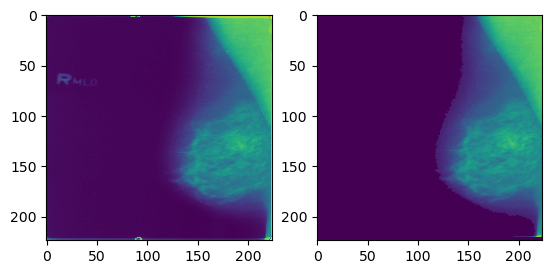

7986_DDSM.png


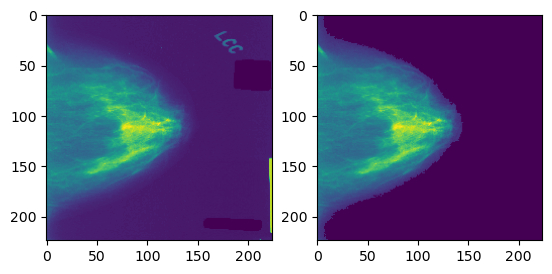

10320_DDSM.png


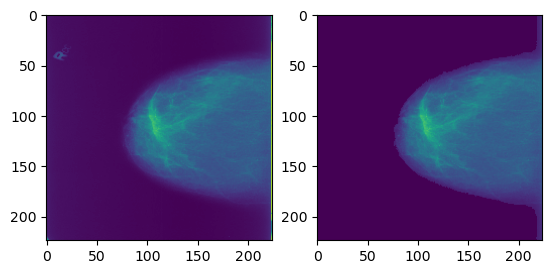

10146_DDSM.png


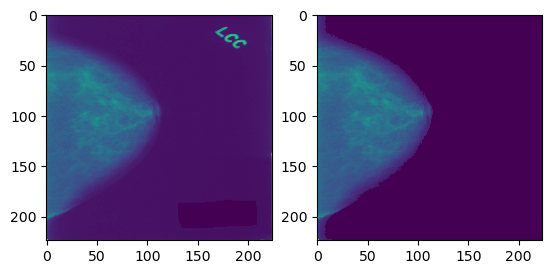

9342_DDSM.png


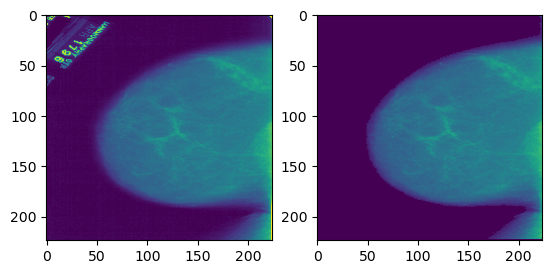

3666_DDSM.png


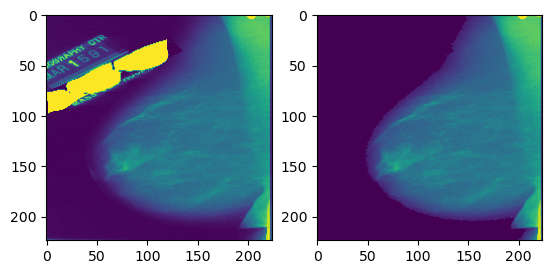

1506_DDSM.png


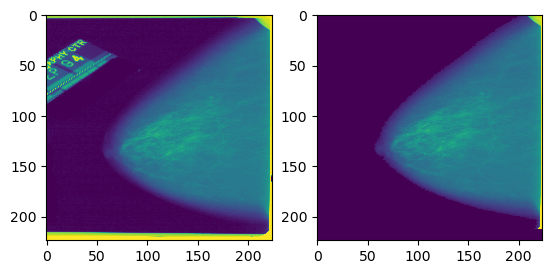

4950_DDSM.png


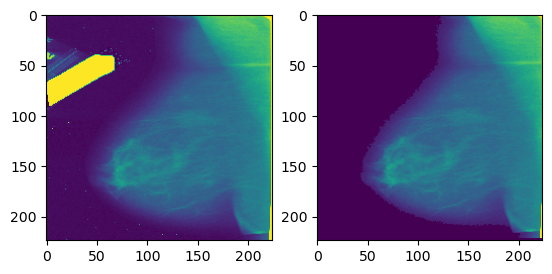

8010_DDSM.png


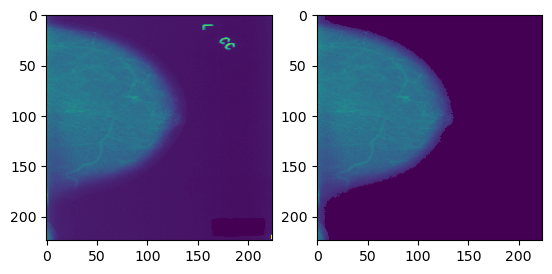

4368_DDSM.png


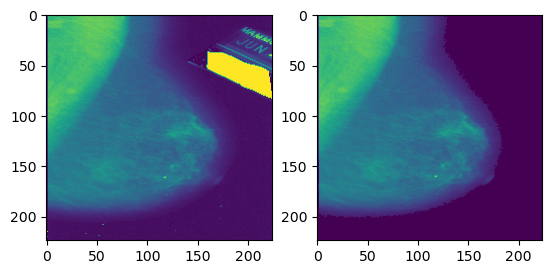

324_DDSM.png


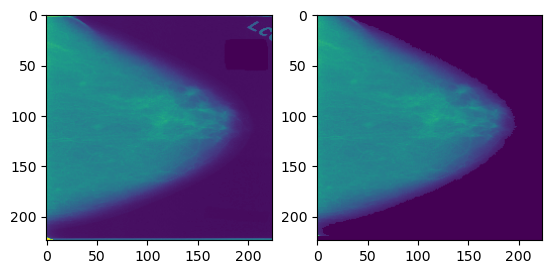

4734_DDSM.png


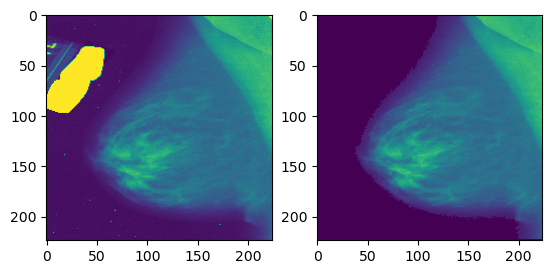

7560_DDSM.png


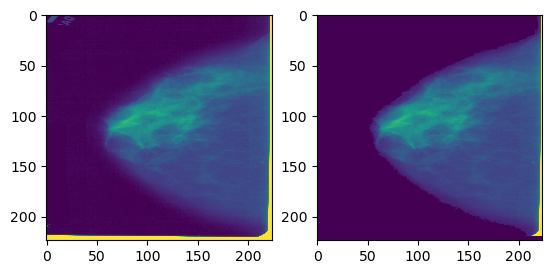

6366_DDSM.png


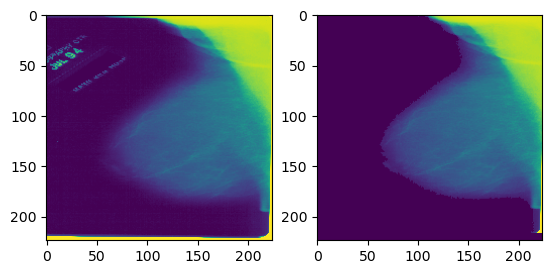

8058_DDSM.png


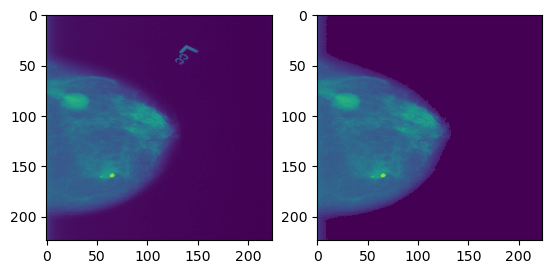

4146_DDSM.png


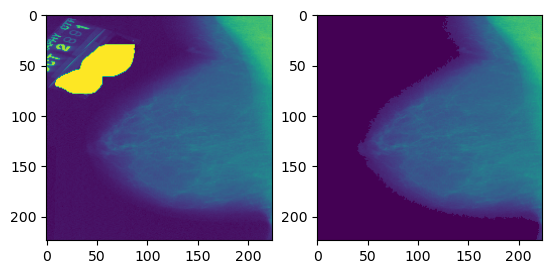

2028_DDSM.png


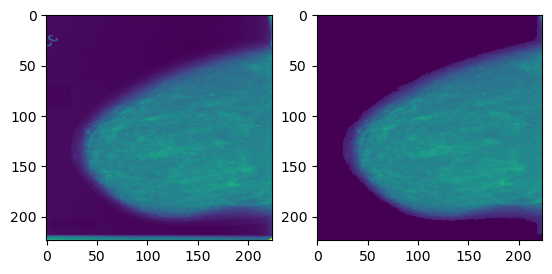

954_DDSM.png


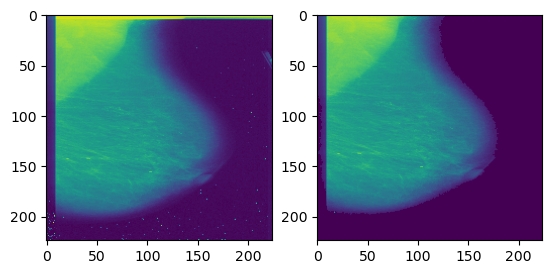

5526_DDSM.png


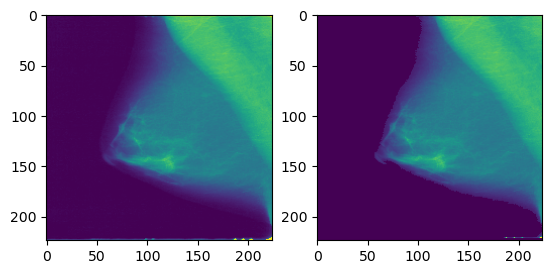

8496_DDSM.png


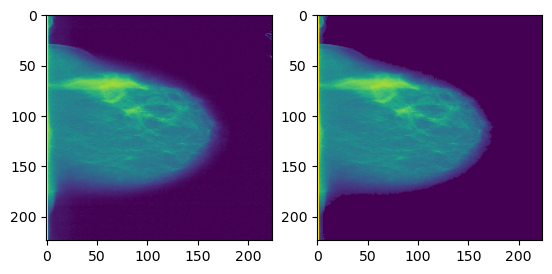

4674_DDSM.png


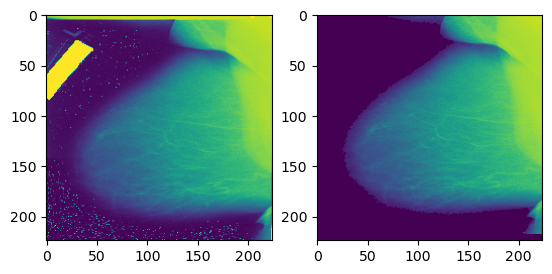

6984_DDSM.png


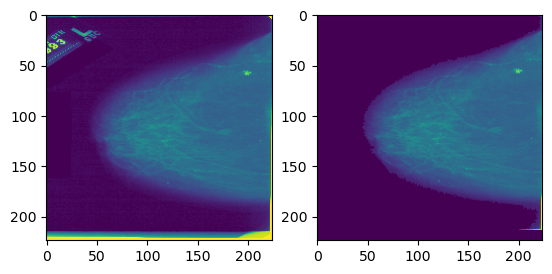

264_DDSM.png


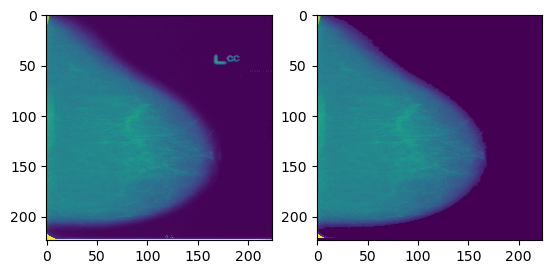

2346_DDSM.png


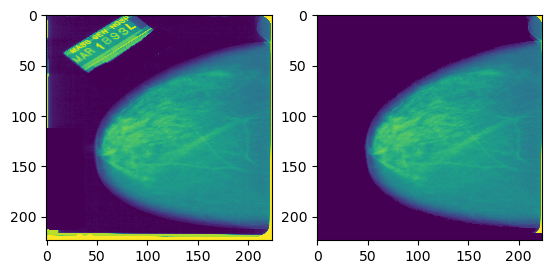

7380_DDSM.png


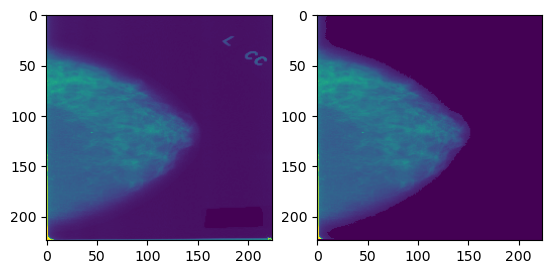

3540_DDSM.png


KeyboardInterrupt: 

In [425]:
for i in range(10):
    for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_two_classes')):
        for file in files:
            if file.endswith(".png"):
                img = image.imread(os.path.join(root,file))
                print(file)


                segmented = segment_breast(img,20)
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(img)
                axarr[1].imshow(segmented, vmax = img.max())
                plt.show()


In [482]:
from segment import segment

In [483]:

mask, bbox = segment(img)

/Users/krystianzielinski/Documents/repos/federated_learning_demo/lib/segment.py:56: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im_small_filt = median(im_small, disk(50))


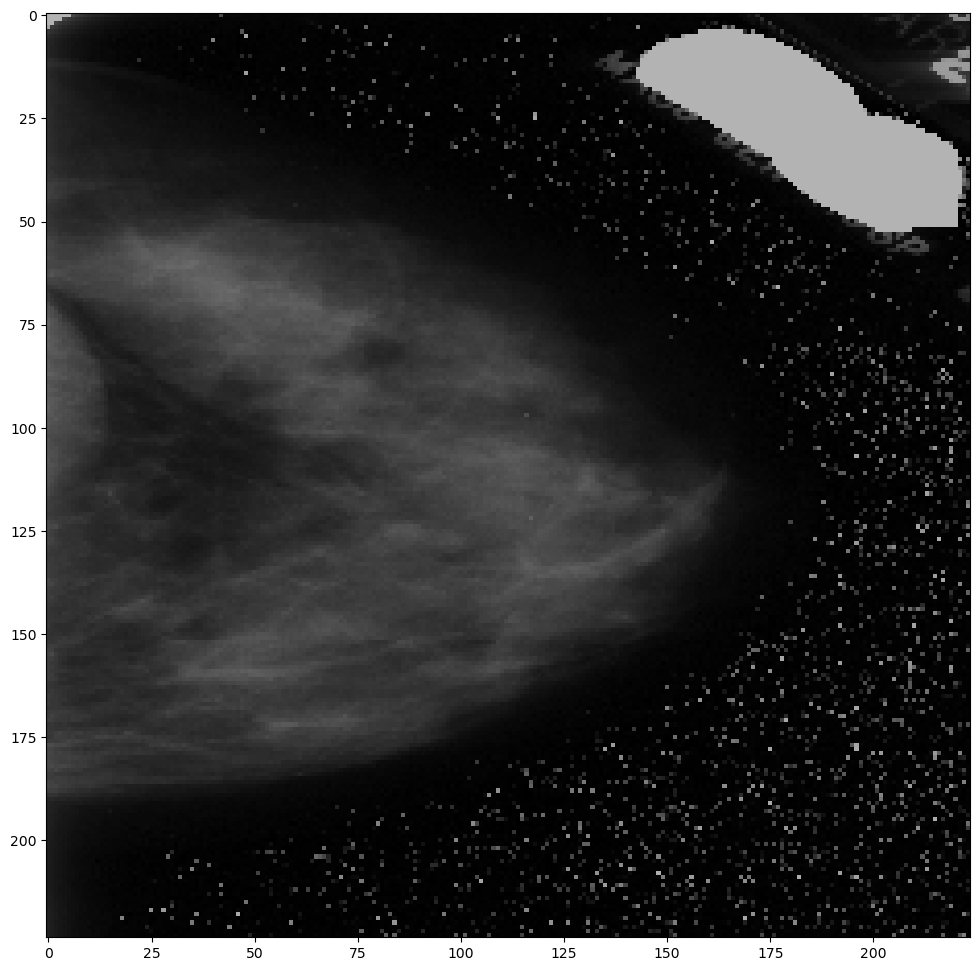

In [489]:
f = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
ax.imshow(img, cmap='gray')
ax.imshow(mask, alpha=.3, cmap='inferno') # alpha controls the transparency
plt.show()

/Users/krystianzielinski/Documents/repos/federated_learning_demo/lib/segment.py:56: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im_small_filt = median(im_small, disk(50))


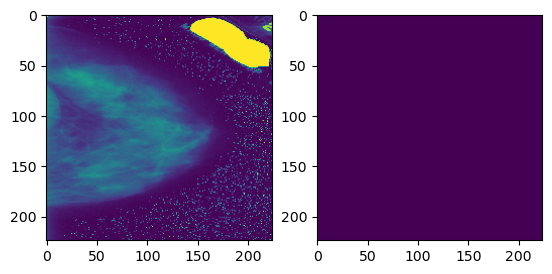

In [488]:
mask, bbox = segment(img)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(mask, vmax = 1)


In [484]:
img = image.imread('785_DDSM.png')

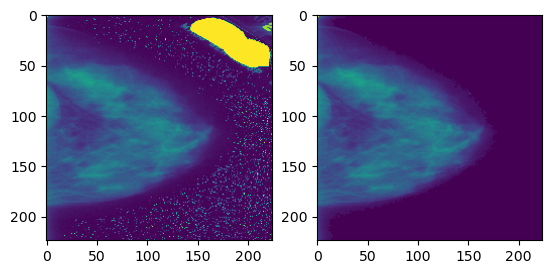

In [485]:

segmented = segment_breast(img,10)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(segmented, vmax = 1)


In [ ]:
pil_version = Image.fromarray(np.uint8(final_result*255), 'L')

In [ ]:
pil_version.save('final_result_pil.png')

# Splitting into test-train-val

In [426]:
filenames_dict = {}
subsets = ['valid', 'test', 'train']
classes = ['ND', 'D']

In [428]:

for density_class in classes:
    filenames_dict[density_class] = []
    for subset in subsets:
        files = os.listdir(
            os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_two_classes',subset,density_class)
        )
        files = [x.zfill(14) for x in files]
        filenames_dict[density_class] = filenames_dict[density_class]+ files

In [429]:
for key, value in filenames_dict.items():
    value.sort()

Kazda pacjenta ma wykonywane po 4 zdjecia - wiec aby poprawnie podzielic na podzbiory, przypiszemy do kazdego zdjecia sztuczne id pacjentki i na tej podstaie podzielimy na 3 podzbiory.

In [430]:
filenames_dict

{'ND': ['00000_DDSM.png',
  '00001_DDSM.png',
  '00002_DDSM.png',
  '00003_DDSM.png',
  '00004_DDSM.png',
  '00005_DDSM.png',
  '00006_DDSM.png',
  '00007_DDSM.png',
  '00008_DDSM.png',
  '00009_DDSM.png',
  '00010_DDSM.png',
  '00011_DDSM.png',
  '00016_DDSM.png',
  '00017_DDSM.png',
  '00018_DDSM.png',
  '00019_DDSM.png',
  '00020_DDSM.png',
  '00021_DDSM.png',
  '00022_DDSM.png',
  '00023_DDSM.png',
  '00024_DDSM.png',
  '00025_DDSM.png',
  '00026_DDSM.png',
  '00027_DDSM.png',
  '00028_DDSM.png',
  '00029_DDSM.png',
  '00030_DDSM.png',
  '00031_DDSM.png',
  '00032_DDSM.png',
  '00033_DDSM.png',
  '00034_DDSM.png',
  '00035_DDSM.png',
  '00040_DDSM.png',
  '00041_DDSM.png',
  '00042_DDSM.png',
  '00043_DDSM.png',
  '00048_DDSM.png',
  '00049_DDSM.png',
  '00050_DDSM.png',
  '00051_DDSM.png',
  '00056_DDSM.png',
  '00057_DDSM.png',
  '00058_DDSM.png',
  '00059_DDSM.png',
  '00060_DDSM.png',
  '00061_DDSM.png',
  '00062_DDSM.png',
  '00063_DDSM.png',
  '00088_DDSM.png',
  '00089_DDSM.

In [433]:
filenames_dict['ND'].__len__() + filenames_dict['D'].__len__()

10326

In [432]:
filenames_dict['D'].__len__()

5054

In [441]:
patients_ids = {}

In [442]:
file_ids = 0
patient_id = 0
j=0
while file_ids<(len(filenames_dict['D'])):
    if (abs(int(filenames_dict['D'][file_ids][:5]) - int(filenames_dict['D'][file_ids+3][:5]))==3):
        for i in range(4):
            filename = filenames_dict['D'][file_ids]
            patients_ids[filenames_dict['D'][file_ids]] = patient_id
            
            file_ids+=1
    else:
        filename = filenames_dict['D'][file_ids]
        patients_ids[filenames_dict['D'][file_ids]] = patient_id
        
        file_ids+=1

    # if ((int(filename[:5]) - int(filenames_dict['D'][file_ids-4][:5]))!=3):
    #     print(filenames_dict['D'][file_ids-4])
    #     print(file_ids)
    patient_id +=1


In [443]:
patients_ids

{'00012_DDSM.png': 0,
 '00013_DDSM.png': 0,
 '00014_DDSM.png': 0,
 '00015_DDSM.png': 0,
 '00036_DDSM.png': 1,
 '00037_DDSM.png': 1,
 '00038_DDSM.png': 1,
 '00039_DDSM.png': 1,
 '00044_DDSM.png': 2,
 '00045_DDSM.png': 2,
 '00046_DDSM.png': 2,
 '00047_DDSM.png': 2,
 '00052_DDSM.png': 3,
 '00053_DDSM.png': 3,
 '00054_DDSM.png': 3,
 '00055_DDSM.png': 3,
 '00064_DDSM.png': 4,
 '00065_DDSM.png': 4,
 '00066_DDSM.png': 4,
 '00067_DDSM.png': 4,
 '00068_DDSM.png': 5,
 '00069_DDSM.png': 5,
 '00070_DDSM.png': 5,
 '00071_DDSM.png': 5,
 '00072_DDSM.png': 6,
 '00073_DDSM.png': 6,
 '00074_DDSM.png': 6,
 '00075_DDSM.png': 6,
 '00076_DDSM.png': 7,
 '00077_DDSM.png': 7,
 '00078_DDSM.png': 7,
 '00079_DDSM.png': 7,
 '00080_DDSM.png': 8,
 '00081_DDSM.png': 8,
 '00082_DDSM.png': 8,
 '00083_DDSM.png': 8,
 '00084_DDSM.png': 9,
 '00085_DDSM.png': 9,
 '00086_DDSM.png': 9,
 '00087_DDSM.png': 9,
 '00092_DDSM.png': 10,
 '00093_DDSM.png': 10,
 '00094_DDSM.png': 10,
 '00095_DDSM.png': 10,
 '00100_DDSM.png': 11,
 '001

In [444]:
pd.Series(patients_ids).value_counts().sort_values()

301     1
302     1
418     4
5       4
6       4
       ..
1263    4
1256    4
1188    4
1258    4
632     4
Length: 1265, dtype: int64

In [446]:
pd.Series(patients_ids).loc[(pd.Series(patients_ids)==301)]

02598_DDSM.png    301
dtype: int64

In [447]:
file_ids = 0
j=0
while file_ids<(len(filenames_dict['ND'])):
    if (abs(int(filenames_dict['ND'][file_ids][:5]) - int(filenames_dict['ND'][file_ids+3][:5]))==3):
        for i in range(4):
            filename = filenames_dict['ND'][file_ids]
            patients_ids[filenames_dict['ND'][file_ids]] = patient_id
            
            file_ids+=1
    else:
        filename = filenames_dict['ND'][file_ids]
        patients_ids[filenames_dict['ND'][file_ids]] = patient_id
        
        file_ids+=1

    # if ((int(filename[:5]) - int(filenames_dict['D'][file_ids-4][:5]))!=3):
    #     print(filenames_dict['D'][file_ids-4])
    #     print(file_ids)
    patient_id +=1


In [313]:
import pandas as pd

In [448]:
(pd.Series(patients_ids).value_counts().sort_values()==1).sum()

22

In [450]:
counter = pd.Series(patients_ids).value_counts()

In [452]:
counter.loc[counter==1].index

Int64Index([2120, 1631, 1622, 1620,  301, 1341, 1340, 1453, 1452, 1451, 1630,
            1632, 2119, 1339,  302, 1753, 1752, 1751, 2246, 2245, 2118, 1621],
           dtype='int64')

In [453]:
pd.Series(patients_ids).loc[
    np.isin(pd.Series(patients_ids),counter.loc[counter==1].index)]

02598_DDSM.png     301
02599_DDSM.png     302
00500_DDSM.png    1339
00501_DDSM.png    1340
00502_DDSM.png    1341
01235_DDSM.png    1451
01236_DDSM.png    1452
01237_DDSM.png    1453
02620_DDSM.png    1620
02621_DDSM.png    1621
02622_DDSM.png    1622
02719_DDSM.png    1630
02720_DDSM.png    1631
02721_DDSM.png    1632
03658_DDSM.png    1751
03659_DDSM.png    1752
03660_DDSM.png    1753
06533_DDSM.png    2118
06534_DDSM.png    2119
06535_DDSM.png    2120
07780_DDSM.png    2245
07781_DDSM.png    2246
dtype: int64

In [306]:
patients_ids

{'00000_DDSM.png': 0,
 '00001_DDSM.png': 0,
 '00002_DDSM.png': 0,
 '00003_DDSM.png': 0,
 '00004_DDSM.png': 1,
 '00005_DDSM.png': 1,
 '00006_DDSM.png': 1,
 '00007_DDSM.png': 1,
 '00008_DDSM.png': 2,
 '00009_DDSM.png': 2,
 '00010_DDSM.png': 2,
 '00011_DDSM.png': 2,
 '00016_DDSM.png': 3,
 '00017_DDSM.png': 3,
 '00018_DDSM.png': 3,
 '00019_DDSM.png': 3,
 '00020_DDSM.png': 4,
 '00021_DDSM.png': 4,
 '00022_DDSM.png': 4,
 '00023_DDSM.png': 4,
 '00024_DDSM.png': 5,
 '00025_DDSM.png': 5,
 '00026_DDSM.png': 5,
 '00027_DDSM.png': 5,
 '00028_DDSM.png': 6,
 '00029_DDSM.png': 6,
 '00030_DDSM.png': 6,
 '00031_DDSM.png': 6,
 '00032_DDSM.png': 7,
 '00033_DDSM.png': 7,
 '00034_DDSM.png': 7,
 '00035_DDSM.png': 7,
 '00040_DDSM.png': 8,
 '00041_DDSM.png': 8,
 '00042_DDSM.png': 8,
 '00043_DDSM.png': 8,
 '00048_DDSM.png': 9,
 '00049_DDSM.png': 9,
 '00050_DDSM.png': 9,
 '00051_DDSM.png': 9,
 '00056_DDSM.png': 10,
 '00057_DDSM.png': 10,
 '00058_DDSM.png': 10,
 '00059_DDSM.png': 10,
 '00060_DDSM.png': 11,
 '000

In [475]:
patients_ids_class = {}
file_ids = 0
patient_id = 0
j=0
while file_ids<(len(filenames_dict['D'])):
    if (abs(int(filenames_dict['D'][file_ids][:5]) - int(filenames_dict['D'][file_ids+3][:5]))==3):
        for i in range(4):
            filename = filenames_dict['D'][file_ids]
            patients_ids_class[filenames_dict['D'][file_ids]] = {'patient_id':patient_id, 'density':'D'}
            
            file_ids+=1
    else:
        for i in range(2):
            filename = filenames_dict['D'][file_ids]
            patients_ids_class[filenames_dict['D'][file_ids]] = {'patient_id':patient_id, 'density':'D'}
            
            file_ids+=1

    # if ((int(filename[:5]) - int(filenames_dict['D'][file_ids-4][:5]))!=3):
    #     print(filenames_dict['D'][file_ids-4])
    #     print(file_ids)
    patient_id +=1

file_ids = 0
j=0
while file_ids<(len(filenames_dict['ND'])):
    if (abs(int(filenames_dict['ND'][file_ids][:5]) - int(filenames_dict['ND'][file_ids+3][:5]))==3):
        for i in range(4):
            filename = filenames_dict['ND'][file_ids]
            patients_ids_class[filenames_dict['ND'][file_ids]] = {'patient_id':patient_id, 'density':'ND'}
            
            file_ids+=1
    else:
        for i in range(3):
            filename = filenames_dict['ND'][file_ids]
            patients_ids_class[filenames_dict['ND'][file_ids]] = {'patient_id':patient_id, 'density':'ND'}
            
            file_ids+=1

    # if ((int(filename[:5]) - int(filenames_dict['D'][file_ids-4][:5]))!=3):
    #     print(filenames_dict['D'][file_ids-4])
    #     print(file_ids)
    patient_id +=1



In [459]:
pd.Series(patients_ids).value_counts().sort_values()[:10]

301     2
1338    3
1448    3
2107    3
2232    3
1623    3
2234    3
1615    3
1742    3
9       4
dtype: int64

In [465]:
patients_ids_s = pd.Series(patients_ids)

In [477]:
pd.DataFrame.from_dict(patients_ids_class).T

patient_id density
00012_DDSM.png          0       D
00013_DDSM.png          0       D
00014_DDSM.png          0       D
00015_DDSM.png          0       D
00036_DDSM.png          1       D
...                   ...     ...
10321_DDSM.png       2582      ND
10326_DDSM.png       2583      ND
10327_DDSM.png       2583      ND
10328_DDSM.png       2583      ND
10329_DDSM.png       2583      ND

[10326 rows x 2 columns]

In [463]:
from sklearn.model_selection import train_test_split

In [469]:
filenames_dict

{'ND': ['00000_DDSM.png',
  '00001_DDSM.png',
  '00002_DDSM.png',
  '00003_DDSM.png',
  '00004_DDSM.png',
  '00005_DDSM.png',
  '00006_DDSM.png',
  '00007_DDSM.png',
  '00008_DDSM.png',
  '00009_DDSM.png',
  '00010_DDSM.png',
  '00011_DDSM.png',
  '00016_DDSM.png',
  '00017_DDSM.png',
  '00018_DDSM.png',
  '00019_DDSM.png',
  '00020_DDSM.png',
  '00021_DDSM.png',
  '00022_DDSM.png',
  '00023_DDSM.png',
  '00024_DDSM.png',
  '00025_DDSM.png',
  '00026_DDSM.png',
  '00027_DDSM.png',
  '00028_DDSM.png',
  '00029_DDSM.png',
  '00030_DDSM.png',
  '00031_DDSM.png',
  '00032_DDSM.png',
  '00033_DDSM.png',
  '00034_DDSM.png',
  '00035_DDSM.png',
  '00040_DDSM.png',
  '00041_DDSM.png',
  '00042_DDSM.png',
  '00043_DDSM.png',
  '00048_DDSM.png',
  '00049_DDSM.png',
  '00050_DDSM.png',
  '00051_DDSM.png',
  '00056_DDSM.png',
  '00057_DDSM.png',
  '00058_DDSM.png',
  '00059_DDSM.png',
  '00060_DDSM.png',
  '00061_DDSM.png',
  '00062_DDSM.png',
  '00063_DDSM.png',
  '00088_DDSM.png',
  '00089_DDSM.

In [ ]:
train, test = train_test_split(pd.Series(patients_ids).unique(), test_size=0.4, random_state=42)

# Pipeline